<a href="https://colab.research.google.com/github/dimoreno1992/SocialPythonML/blob/main/DCMS_sdsphd20_portfolio_assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio for SDSPhD20
## Name: Diana Moreno :)

This notebook contains the exercises and assignments to be answered in a portfolio for the PhD course "Social Data Science: An Applied Introduction to Machine Learning" at Aalborg University, November 2020.

Each day of the course you are given an hour to work on a portfolio with the possibility of sparring with the course lecturers. 

You are expected to attempt to solve the various assignments using the methods and tools taught during the course. Answers should be combined into a notebook (fx by adding answers to a copy of this one). 

**Note:** You are not expected to attempt to solve every single assignment. Note the different requirements for each day.

#### How to hand in your portfolio notebooks

You can hand in your portfolio notebooks in two ways:

- Saving your notebooks in a GitHub repository and then sending the repository URL to the course organizer (Kristian Kjelmann)
- Sharing your notebooks directly with the course organizer (Kristian Kjelmann) in Google Colab.

Kristian’s e-mail: kgk@adm.aau.dk

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

---

## Unsupervised machine learning with penguins

The palmer penguin dataset is excellent for EDA and UML. It contains different measures for 3 species of closely related penguins from several islands in Antarctica.

Let's have a look:

Penguin datast: https://github.com/allisonhorst/palmerpenguins
![penguins](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

![penguin_beaks](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/culmen_depth.png)

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Create a new dataset where you scale all numeric values with the standardscaler.
4. Perform a PCA analysis
5. Investigate the explained variance of the components... do we see an 'elbow'?
5. Plot the data in the space of the first two components. Maybe color it by species or island. What pattern do we see?
6. Inspect the correlation between the components. Which variables are they mostly associated with?

#### Data and libraries

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# You solutions from here...
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
penguins.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

In [ ]:
penguins.head()

species_short     island  ...  body_mass_g     sex
0        Adelie  Torgersen  ...       3750.0    MALE
1        Adelie  Torgersen  ...       3800.0  FEMALE
2        Adelie  Torgersen  ...       3250.0  FEMALE
3        Adelie  Torgersen  ...          NaN     NaN
4        Adelie  Torgersen  ...       3450.0  FEMALE

[5 rows x 7 columns]

In [ ]:
print(penguins['species_short'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


In [ ]:
print(penguins['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


In [ ]:
penguins.isnull().sum()

species_short         0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

### 1. What do we have here

We have 7 columns with object and floats 2 nulls in 4 out of 7 columns. Records are 344.

In [ ]:
#drop na
penguins_na = penguins.dropna()
penguins_na.isnull().sum()

species_short        0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
# You solutions from here...
penguins_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [ ]:
# You solutions from here...
penguins_na.head(10)

species_short     island  ...  body_mass_g     sex
0         Adelie  Torgersen  ...       3750.0    MALE
1         Adelie  Torgersen  ...       3800.0  FEMALE
2         Adelie  Torgersen  ...       3250.0  FEMALE
4         Adelie  Torgersen  ...       3450.0  FEMALE
5         Adelie  Torgersen  ...       3650.0    MALE
6         Adelie  Torgersen  ...       3625.0  FEMALE
7         Adelie  Torgersen  ...       4675.0    MALE
12        Adelie  Torgersen  ...       3200.0  FEMALE
13        Adelie  Torgersen  ...       3800.0    MALE
14        Adelie  Torgersen  ...       4400.0    MALE

[10 rows x 7 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:601: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  scout = ax.scatter(scout_x, scout_y, **kws)


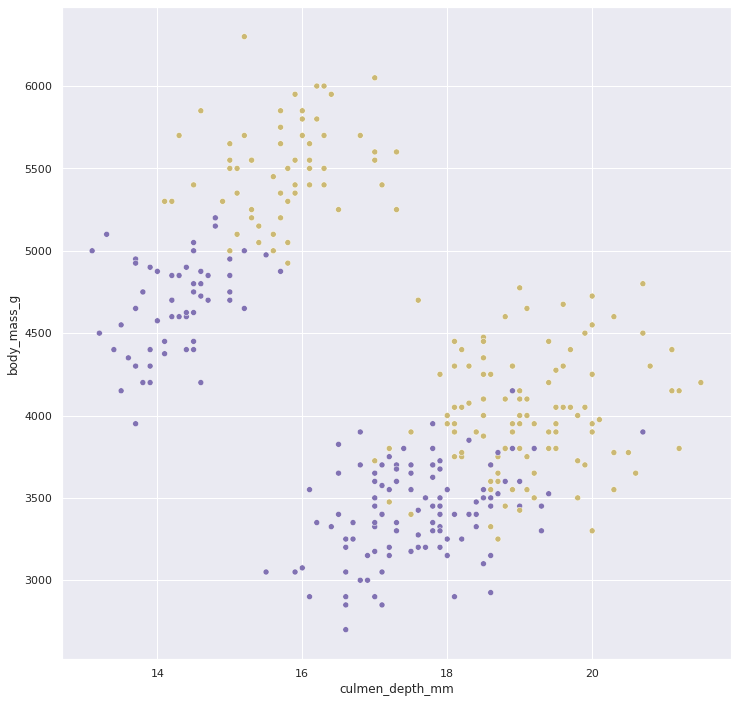

In [ ]:
import matplotlib.pyplot as plt # standard plotting library
import numpy as np
plt.figure(figsize=(12,12))
colors = np.where(penguins_na['sex'] == 'MALE', 'y', 'M')
g = sns.scatterplot(penguins_na.iloc[:,3], penguins_na.iloc[:,5], legend='full', palette='viridis',
            c=colors)
legend = g.get_legend()

### 3. Lets scale the df

In [ ]:
# Let's standard-scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

penguins_scaled = scaler.fit_transform(penguins_na.iloc[:,2:6])
penguins_scaled


array([[-0.89765322,  0.78348666, -1.42952144, -0.57122888],
       [-0.82429023,  0.12189602, -1.07240838, -0.50901123],
       [-0.67756427,  0.42724555, -0.42960487, -1.19340546],
       ...,
       [ 1.17485108, -0.74326098,  1.49880565,  1.91747742],
       [ 0.22113229, -1.20128527,  0.78457953,  1.23308319],
       [ 1.08314735, -0.53969463,  0.85600214,  1.48195382]])

### 4. Lets perform the PCA

In [ ]:
# Import the module and instantiate a PCA object
from sklearn.decomposition import PCA
model = PCA(n_components=4) #We pick 7 as the number of components...just because (it's a 3rd of the columns available)

# Fit and transform the data
penguins_reduced = model.fit_transform(penguins_scaled)
penguins_reduced.shape

(334, 4)

In [ ]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()

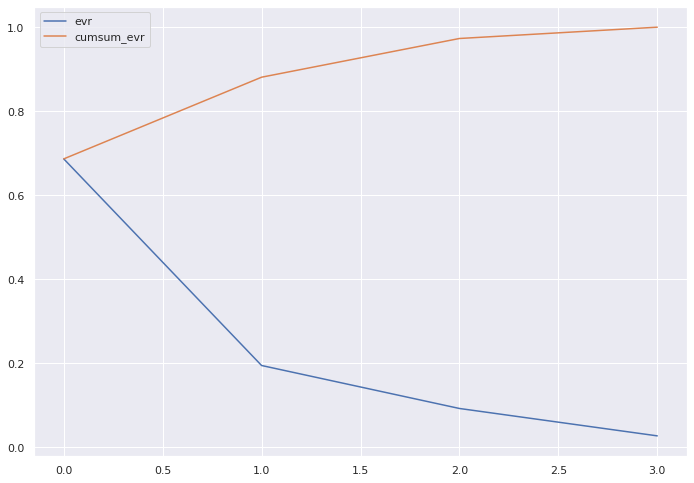

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [ ]:
# How mach "information" do we kick out?
model.explained_variance_ratio_.sum()

1.0

In [ ]:
pcscores = pd.DataFrame(penguins_reduced)
loadings = pd.DataFrame(model.components_, columns=penguins_na.iloc[:,2:6].columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

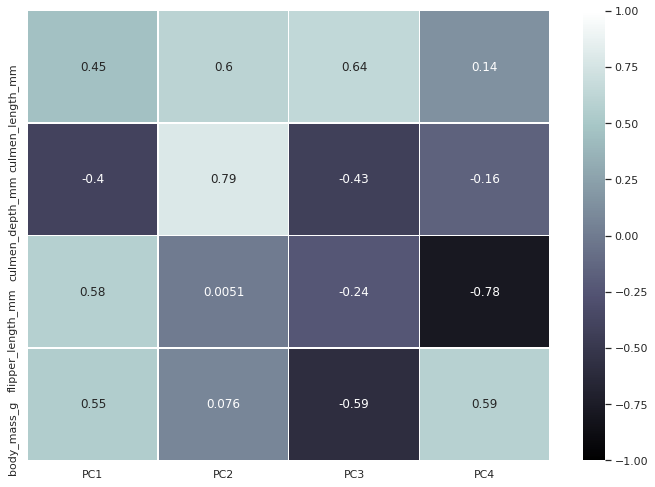

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [ ]:
import altair as alt

# Define the data that we are going to use as a dataframe
d = pd.DataFrame({'y': penguins_reduced[:,1],
                 'x': penguins_reduced[:,0], 
                 'specie': penguins_na['species_short']})

alt.Chart(d).mark_point().encode(
    x='x',
    y='y',
    color='specie',
   # tooltip=['place', 'country', 'region']
).interactive()


alt.Chart(...)

---

## Clustering

I have created a larger set of variables from the Danish Value Study from 1999. You can find data here:

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/value99.csv

In all examples, values towards 1 is agree a lot and values towards 5 is disagree a lot.

As an example: "Does not want alchoholics as neighbors" --> 1=does not want, 2=doesnt care

Or: Trust to the military --> 1=Trust very much, 2= Trust some, 3=Trust a little 4=Does not trust at all 

[![2hAEhX.md.png](https://iili.io/2hAEhX.md.png)](https://freeimage.host/i/2hAEhX)

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

In [ ]:
# Your solutions from here...

---

## Supervised machine learning with penguins

This assignment uses the same data as for "unsupervised machine learning with penguins". 

If you created solutions for "unsupervised machine learning with penguins", jump to assignment 3.

### The assignment

1. Inspect the data with some of the standard functions you learned so far (desc, info etc.). What do we have here?
2. Likewise, use some standard visualizations (eg. from seaborn) to express some properties of the data
3. Apply stanbdard preprocessing (eg. missing values, scaling, outliers, one-hot-encoding)
4. Split the data in a train & test sample
5. Fit a classification model (target outcome = 'species') on the training data, and evaluate its performance on the test data.
   * Use first a logistic regression to do so.
   * Then, use 2-3 more complex model classes of your choice.

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# You solutions from here...

## Employee turnover

### The assignment

In the repo, you will find a dataset describing employee turnover in a company.

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable `churn` tells us if the employee left the company in the past 3 months. The other variables are collected

#### Classification

Try to predict `churn` using a classification pipeline (perhaps add some simple exploration of the data first)

#### Regression
Try to predict the number of weekly average hours worked.

**Before** working with the data, you should use `pd.get_dummies` to get dummies for categorical variables.

In [ ]:
# Your solutions from here...
#1 Loading and selecting data
df = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv')
##Lets explore the data
df.head(3)

satisfaction  evaluation  number_of_projects  ...  promotion  department  salary
0          0.38        0.53                   2  ...          0       sales     low
1          0.80        0.86                   5  ...          0       sales  medium
2          0.11        0.88                   7  ...          0       sales  medium

[3 rows x 10 columns]

In [ ]:
## Describe the data, ranges checked. I decide to use 'satisfaction':'time_spend_company' independent features used to train the model 
df.describe()

satisfaction    evaluation  ...         churn     promotion
count  14999.000000  14999.000000  ...  14999.000000  14999.000000
mean       0.612834      0.716102  ...      0.238083      0.021268
std        0.248631      0.171169  ...      0.425924      0.144281
min        0.090000      0.360000  ...      0.000000      0.000000
25%        0.440000      0.560000  ...      0.000000      0.000000
50%        0.640000      0.720000  ...      0.000000      0.000000
75%        0.820000      0.870000  ...      0.000000      0.000000
max        1.000000      1.000000  ...      1.000000      1.000000

[8 rows x 8 columns]

In [ ]:
## Select the (independant) features that we are going to use to train the model
df_scaled = df.copy()
X = df_scaled.loc[:,'satisfaction':'time_spend_company'] #locate the columns used in the training the numerical values

## Define the dependant variabel / target to predict (churn)
# pd.get_dummies(df_scaled, columns = ['department','salary'])
y = df.churn

In [ ]:
#2 Transforming, preprocessing and splitting
## Load and instantiate a LabelEncoder that will turn our text labels (regions- departments and salary - into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

## Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

## Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

## Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 42)

In [ ]:
#3 Training and evaluating various models
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

In [ ]:
## LogisticRegression
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))


[0.76625    0.77291667 0.765      0.775      0.762401  ]
0.756


In [ ]:
# Performance evaluation using the classification_report
# 1 the employee left the company in the past 3 months, 0 if not 
target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2294
           1       0.46      0.24      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.58      0.58      3000
weighted avg       0.72      0.76      0.73      3000



(<Figure size 842.4x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f944c282c18>)

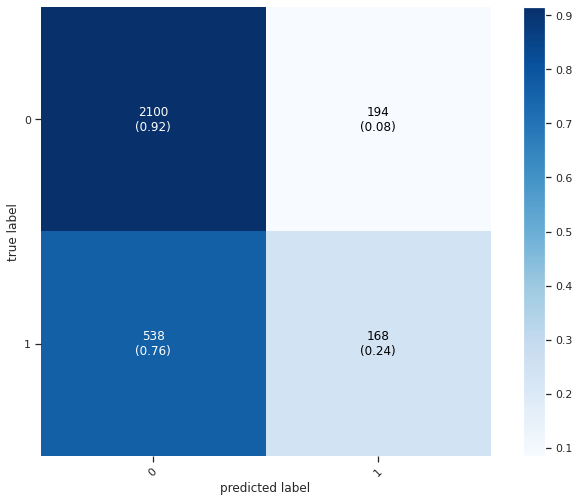

In [ ]:
!!pip uninstall -qq mlxtend -y
!pip install -qq -U mlxtend
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

In [ ]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

[0.98958333 0.98958333 0.98916667 0.9925     0.99166319]
0.9886666666666667


In [ ]:
# Performance evaluation using the classification_report

#target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.98       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



(<Figure size 842.4x595.44 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f944a5956a0>)

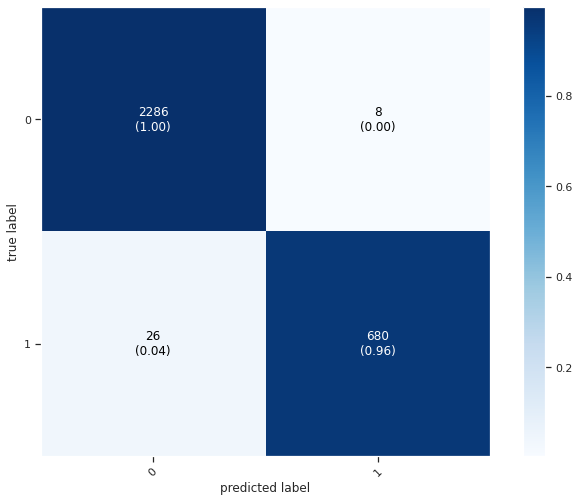

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

Try to predict the number of weekly average hours worked.

In [ ]:
df_scaled.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department', 'salary'],
      dtype='object')

In [ ]:
# picking a different outcome variable
df_scaled['waw'] = df_scaled.average_montly_hours/4
del df_scaled['average_montly_hours']
y_waw = df_scaled.waw
# We need to creat new train / test splits here - as the y_waw was not part of the previous split.
X_train, X_test, y_train, y_test, df_scaled_train, df_scaled_test = train_test_split(X_scaled, y_waw, df_scaled, test_size = 0.2, random_state = 42)

In [ ]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

1.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


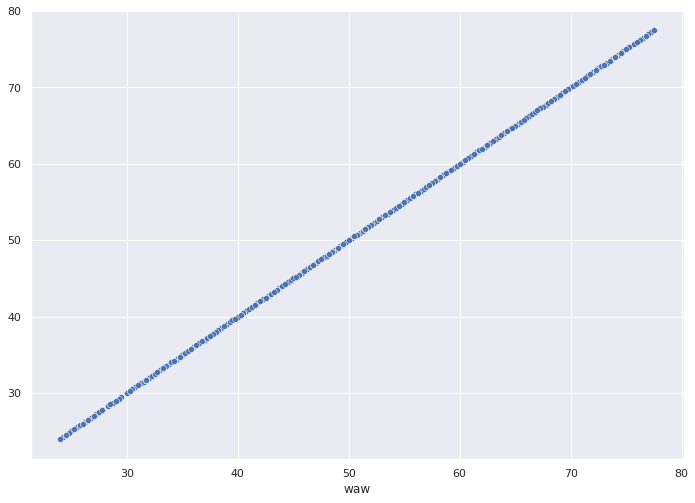

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)
sns.scatterplot(y_test,y_pred)

---

# Portfolio assignments for Wednesday

**Requirement:** Work on solutions for *either* the network analysis case study 1 or case study 2 *and* the exercise for spatial stuff.

## Network analysis: Case Study 1: Directed Networks: Friends & Foes at Work

### Introduction to the case

* Emmanuel Lazega, The Collegial Phenomenon: The Social Mechanisms of Cooperation Among Peers in a Corporate Law Partnership, Oxford University Press (2001).

#### Data 
This data set comes from a network study of corporate law partnership that was carried out in a Northeastern US corporate law firm, referred to as SG&R, 1988-1991 in New England. It includes (among others) measurements of networks among the 71 attorneys (partners and associates) of this firm, i.e. their strong-coworker network, advice network, friendship network, and indirect control networks. Various members' attributes are also part of the dataset, including seniority, formal status, office in which they work, gender, lawschool attended, individual performance measurements (hours worked, fees brought in), attitudes concerning various management policy options, etc. This dataset was used to identify social processes such as bounded solidarity, lateral control, quality control, knowledge sharing, balancing powers, regulation, etc. among peers.

#### Setting
* What do corporate lawyers do? Litigation and corporate work.
* Division of work and interdependencies.
* Three offices, no departments, built-in pressures to grow, intake and assignment rules.
* Partners and associates: hierarchy, up or out rule, billing targets.
* Partnership agreement (sharing benefits equally, 90% exclusion rule, governance structure, elusive committee system) and incompleteness of the contracts.
* Informal, unwritten rules (ex: no moonlighting, no investment in buildings, no nepotism, no borrowing to pay partners, etc.).
* Huge incentives to behave opportunistically ; thus the dataset is appropriate for the study of social processes that make cooperation among rival partners possible. 
* Sociometric name generators used to elicit coworkers, advice, and 'friendship' ties at SG&R:"Here is the list of all the members of your Firm."

The networks where created according to the follwoing questionaire:

* Strong coworkers network: "Because most firms like yours are also organized very informally, it is difficult to get a clear idea of how the members really work together. Think back over the past year, consider all the lawyers in your Firm. Would you go through this list and check the names of those with whom you have worked with. By "worked with" I mean that you have spent time together on at least one case, that you have been assigned to the same case, that they read or used your work product or that you have read or used their work product; this includes professional work done within the Firm like Bar association work, administration, etc."
* Basic advice network: "Think back over the past year, consider all the lawyers in your Firm. To whom did you go for basic professional advice? For instance, you want to make sure that you are handling a case right, making a proper decision, and you want to consult someone whose professional opinions are in general of great value to you. By advice I do not mean simply technical advice."
* 'Friendship' network:
"Would you go through this list, and check the names of those you socialize with outside work. You know their family, they know yours, for instance. I do not mean all the people you are simply on a friendly level with, or people you happen to meet at Firm functions." 

### Data preperation

#### Packages

In [ ]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

     |████████████████████████████████| 8.9MB 5.4MB/s 
     |████████████████████████████████| 2.2MB 37.5MB/s 
  Created wheel for bokeh: filename=bokeh-2.2.3-cp36-none-any.whl size=9296310 sha256=724537382d94c7f4894884daa55e48f58a66d887e74d1cef158ddbadea972215
  Stored in directory: /root/.cache/pip/wheels/dc/96/7b/9c9d48ed392511bc708e39580e18dc7a92f475795cd26b51bf
Successfully built bokeh
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0
  Found existing installation: bokeh 2.1.1
    Uninstalling bokeh-2.1.1:
      Successfully uninstalled bokeh-2.1.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
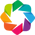

In [ ]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

####  Load the data

Lets load the data! The three networks refer to cowork, friendship, and advice. The first 36 respondents are the partners in the firm.

(the cell belows reads in the tables, performs some recoding and cleanup and creates network objects for the 3 data sets).

In [ ]:
mat_friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
mat_advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
mat_work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

G_friendship = nx.from_pandas_adjacency(mat_friendship, create_using=nx.DiGraph)
G_advice = nx.from_pandas_adjacency(mat_advice, create_using=nx.DiGraph)
G_work = nx.from_pandas_adjacency(mat_work, create_using=nx.DiGraph)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(G_friendship, attributes_dict)
nx.set_node_attributes(G_advice, attributes_dict)
nx.set_node_attributes(G_work, attributes_dict)

print(nx.get_node_attributes(G_friendship, 'seniority'))

#Print types of network graphs
print(type(G_friendship))
print(type(G_advice))
print(type(G_work))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

In [ ]:
help(nx.from_pandas_adjacency)

Help on function from_pandas_adjacency in module networkx.convert_matrix:

from_pandas_adjacency(df, create_using=None)
    Returns a graph from Pandas DataFrame.
    
    The Pandas DataFrame is interpreted as an adjacency matrix for the graph.
    
    Parameters
    ----------
    df : Pandas DataFrame
      An adjacency matrix representation of a graph
    
    create_using : NetworkX graph constructor, optional (default=nx.Graph)
       Graph type to create. If graph instance, then cleared before populated.
    
    Notes
    -----
    For directed graphs, explicitly mention create_using=nx.DiGraph,
    and entry i,j of df corresponds to an edge from i to j.
    
    If `df` has a single data type for each entry it will be converted to an
    appropriate Python data type.
    
    If `df` has a user-specified compound data type the names
    of the data fields will be used as attribute keys in the resulting
    NetworkX graph.
    
    See Also
    --------
    to_pandas_adjacency

Now I will create the unidirected graphs for using them layer

In [ ]:
friendship = pd.read_table("https://www.dropbox.com/s/0saiulir3pr566k/ELfriend.dat?dl=1", delim_whitespace=True, header=None) 
advice = pd.read_table("https://www.dropbox.com/s/apq42n1grim23k9/ELadv.dat?dl=1", delim_whitespace=True, header=None) 
work = pd.read_table("https://www.dropbox.com/s/dliz0sd7or8tv01/ELwork.dat?dl=1", delim_whitespace=True, header=None)

U_friendship = nx.from_pandas_adjacency(friendship)
U_advice = nx.from_pandas_adjacency(advice)
U_work = nx.from_pandas_adjacency(work)

attributes = pd.read_table("https://www.dropbox.com/s/qz7fvfgx8lvjgpr/ELattr.dat?dl=1", delim_whitespace=True, header=None, dtype='int') 
attributes=attributes.round().astype(int)
attributes.columns = ["id", "seniority", "gender", "office", "tenure", "age", "practice", "school"]
attributes.set_index('id',inplace=True)

cleanup_nums = {"seniority":     {1: "Partner", 2: "Associate"},
                "gender":     {1: "Male", 2: "Female"},
                "office":     {1: "Boston", 2: "Hartford", 3:"Providence"},
                "practice":     {1: "Litigation", 2: "Corporate"},
                "school":     {1: "Harvard, Yale", 2: "Ucon", 3: "Others"}
                } 
attributes.replace(cleanup_nums, inplace=True)

attributes_dict=attributes.T.to_dict()

nx.set_node_attributes(U_friendship, attributes_dict)
nx.set_node_attributes(U_advice, attributes_dict)
nx.set_node_attributes(U_work, attributes_dict)

print(nx.get_node_attributes(U_friendship, 'seniority'))

#Print types of network graphs
print(type(U_friendship))
print(type(U_advice))
print(type(U_work))

{1: 'Partner', 2: 'Partner', 3: 'Partner', 4: 'Partner', 5: 'Partner', 6: 'Partner', 7: 'Partner', 8: 'Partner', 9: 'Partner', 10: 'Partner', 11: 'Partner', 12: 'Partner', 13: 'Partner', 14: 'Partner', 15: 'Partner', 16: 'Partner', 17: 'Partner', 18: 'Partner', 19: 'Partner', 20: 'Partner', 21: 'Partner', 22: 'Partner', 23: 'Partner', 24: 'Partner', 25: 'Partner', 26: 'Partner', 27: 'Partner', 28: 'Partner', 29: 'Partner', 30: 'Partner', 31: 'Partner', 32: 'Partner', 33: 'Partner', 34: 'Partner', 35: 'Partner', 36: 'Partner', 37: 'Associate', 38: 'Associate', 39: 'Associate', 40: 'Associate', 41: 'Associate', 42: 'Associate', 43: 'Associate', 44: 'Associate', 45: 'Associate', 46: 'Associate', 47: 'Associate', 48: 'Associate', 49: 'Associate', 50: 'Associate', 51: 'Associate', 52: 'Associate', 53: 'Associate', 54: 'Associate', 55: 'Associate', 56: 'Associate', 57: 'Associate', 58: 'Associate', 59: 'Associate', 60: 'Associate', 61: 'Associate', 62: 'Associate', 63: 'Associate', 64: 'Asso

In [ ]:
print(nx.info(G_friendship))
print(nx.info(G_advice))
print(nx.info(G_work))

print(type(G_friendship))

Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 575
Average in degree:   8.0986
Average out degree:   8.0986
Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 892
Average in degree:  12.5634
Average out degree:  12.5634
Name: 
Type: DiGraph
Number of nodes: 71
Number of edges: 756
Average in degree:  10.6479
Average out degree:  10.6479
<class 'networkx.classes.digraph.DiGraph'>


#### Calculate dimensional centralities

There might be better ways to do that (still experimenting), but for now lets first create centralities upfront for all networks. We for now only look at the in-degree.

In [ ]:
cent_degree_friendship = dict(G_friendship.in_degree)
cent_degree_advice = dict(G_advice.in_degree)
cent_degree_work = dict(G_work.in_degree)

In [ ]:
nx.set_node_attributes(G_friendship, cent_degree_friendship, 'cent_degree')
nx.set_node_attributes(G_advice, cent_degree_advice, 'cent_degree')
nx.set_node_attributes(G_work, cent_degree_work, 'cent_degree')

In [ ]:
print(type(G_friendship))

<class 'networkx.classes.digraph.DiGraph'>


In [ ]:
# Create and save a layout.
G_layout = nx.layout.kamada_kawai_layout(G_work)

In [ ]:
g_plot = hv.Graph.from_networkx(G_friendship, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right'
                                                                        )

show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_advice, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='cent_degree', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

In [ ]:
g_plot = hv.Graph.from_networkx(G_work, G_layout).opts(tools=['hover'],
                                                                        directed=True,
                                                                        edge_alpha=0.25,
                                                                        node_size='cent_degree',
                                                                        #node_color='seniority', cmap='Set1',
                                                                        legend_position='right')
show(hv.render(g_plot))

#### Assortiativity

We can also calculate another interested measure, particularly in social networks: Assortiativity. In a nutshell, it measures if two nodes that share certain characteristics ahve a higher or lower probability to be connected.

For details, check:

* Newman, M. E. J. (27 February 2003). "Mixing patterns in networks". Physical Review E. American Physical Society (APS). 67 (2): 026126

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'seniority')

0.5354650209260934

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'school')

0.019171775624653234

In [ ]:
nx.attribute_assortativity_coefficient(G_friendship, 'office')

0.03651083062621142

#### Reciprocity

Anotyher interesting question usually is, if directed edges are reciptocated, meaning that an edge between `i,j` makes an edge between `j,i` more likely

In [ ]:
nx.overall_reciprocity(G_friendship)

0.6121739130434782

### The assignment

Explore the network further.

1. Calculate the reciprocity for the work and advise network. Are the numbers diffetrent? Why might that be the case?
2. Identify communities in the friendship and advice network (hint: works only on undirected networks, so you might have to create an undirected graph)
3. Visualize these communities (static or dynamic)

In [ ]:
# Your solutions here...
print("Work Reciprocity:", nx.overall_reciprocity(G_work),  "Advice Reciprocity:" ,
                            nx.overall_reciprocity(G_advice))

Work Reciprocity: 1.0 Advice Reciprocity: 0.3923766816143498


Work maybe because is a double way connection, meaning if i works with j, j works with i.
Advice maybe denotes a hierarchical structure or an advice/supervision confusion.

In [ ]:
#Create undirected network
# Import libraries
import community # `python-louvain` is implemented here
# Find the optimal partition with the Louvain algorithm.
com = community.best_partition(U_friendship)
max(com.values())

4

In [ ]:
ucent_degree = dict(nx.degree(U_friendship))
nx.set_node_attributes(U_friendship, ucent_degree, 'cent_degree')
nx.set_node_attributes(U_friendship, com, 'community')

g_plot = hv.Graph.from_networkx(U_friendship, G_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

In [ ]:
#Create undirected network
# Find the optimal partition with the Louvain algorithm.
com = community.best_partition(U_advice)
max(com.values())

2

In [ ]:
ucent_degree = dict(nx.degree(U_advice))
nx.set_node_attributes(U_advice, ucent_degree, 'cent_degree')
nx.set_node_attributes(U_advice, com, 'community')

g_plot = hv.Graph.from_networkx(U_advice, G_layout).opts(tools=['hover'],
                                                  node_size='cent_degree', 
                                                  node_color='community', cmap=plt.cm.Set1,
                                                  legend_position='right')

show(hv.render(g_plot))

## Network analysis: Case Study 2 in 2-Mode Networks: Exploring Instagram Hashtag Networks

In this notebook, we will collect data from Instagram to construct (snowball) a network of hashtags as well as a (2-mode) bipartite network of Instagram users and hashtags.

The networks in this example can be considered synthetic, since nodes and particularly edges represent virtual constructs rather than explicit connections.


In this case we explore

- Graph construction (normal and bipartite)
- Calculation of centrality indicators 
- Community detection
- Projection of bipartite network

Furthermore you will learn:

- to make simple (public) API requests (API: Application Programming Interface) 
- parse json response
- perform simple string manipulation/text-mining to extract features of interest (Transition into NLP)

### So what?

Such an analysis can be useful in marketing to identify sub-dicussions in a niche or related to a brand. We will detect popular hashtags within sub-niches that "correlate" with a topic of interest.
Furthermore, we will identify accounts with high engagement (post-counts) within specific hashtag communities.

Unfortunately Instagram, very recently (few days back), diesabled a simple public API that allowed to map usernames form user-ids. Therefore, we will use ```instaloader```, a module for interacting with Instagram. 

We will only use public data that does not require log-in. If you want to explore other graph structures on Instagram (e.g. follow-networks), have a look at Instabot.

### Tooling Setup

In [ ]:
# Installing visualization packages
!pip install -U bokeh
!pip install -q holoviews

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import itertools # Python's amazing iteration & combination library
import networkx as nx
import community

from nltk.tokenize import TweetTokenizer # A bit of a transition into NLP. The tweet tokenizer from the NLTK library will help us extract the hashtags from post-text
tknzr = TweetTokenizer()
import requests as rq # The requests library handles "requests" to APIs similar to a browser that requests a webpage given a URL
from networkx.algorithms import bipartite # bipartite NW algos

In [ ]:
# Visualization defaults
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
from bokeh.plotting import show

# Setting the default figure size a bit larger
defaults = dict(width=750, height=750, padding=0.1,
                xaxis=None, yaxis=None)
hv.opts.defaults(
    opts.EdgePaths(**defaults), opts.Graph(**defaults), opts.Nodes(**defaults))

### Getting the data

In [ ]:
# Defining global constants for the instagram extract

# Note: These things may change without a warning...

# Instagram base url preffix
tagurl_prefix = 'https://www.instagram.com/explore/tags/'

# suffix to append to tag request url to retrieve data in JSON format
tagurl_suffix = '/?__a=1'

# suffix to end cursor when requesting posts by tag
tagurl_endcursor = '&max_id='

# a generic media post preffix (concat with media shortcode to view)
posturl_prefix = 'https://www.instagram.com/p/'

# target initial tags (we will run this with only one tag but the code can take multiple - just extend the list)
tags = ['machinelearning']

In [ ]:
# urls to initial tags using the above url-components
queries = [ tagurl_prefix + tag + tagurl_suffix for tag in tags ]

The response structure of this Insta endpoint is not really straightforward. You can read more about it in the original post.
The data is most likely composed on request by some large-scale graph database at returned. Instagram obviously assumes that the receiving site is a browser exploring public posts.

We also don't get all posts for some hashtag right away but a "page" ~25 posts.

To receive further posts, we need to pass a new requests specifying "our position" by providing an end_cursor.

This **end cursor** can be found in

```
response['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor']
```

#### Some thoughts on JSON

This brings us to JSON. Think of JSON objects as of combinations of dictionaries and lists that can contain most Python objects (e.g. lists, dictionaries, tuples, strings, ints etc.) that can be represented as text. Once parsed you can operate JSON objects just as any other dictionary or list in Python.
More about JSON - here:

In [ ]:
edges = []
for q in queries:    
    for i in range(10): # how many iterations/deepth ?
        r = rq.get(q).json()
        end_cursor = r['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor']
        edges.extend(r['graphql']['hashtag']['edge_hashtag_to_media']['edges'])
        print(i)
        q = q + tagurl_endcursor + end_cursor

### Bringing the collected data into useful format...

In the next step we will take the rich raw posts data and extract only the information that we need for our analysis. We will just cut out owner-id (account that posted), a shortcode that we can use to identify the post and get more data on it in future if needed, and the text including the hashtags.

To make things more compact we not only extract the raw data but we also preprocess a bit.

The hashtags are incorporated within the post-text. Therefore, we pass the text of each post through a tokenizer, that identifies individual words and elements (such as emoji). We use the tweet-tokenizer from the NLTK library, which is made for working with social media data.

```
  tokens = tknzr.tokenize(text)
  tags = [x.strip('#') for x in tokens if x.startswith('#')]
```

The first line turns the text of the post in a list of tokens (words & co.). The second line picks out only the elements that start with a "#" and strips the "#" when adding them to a list.

Then we construct a dictionary with these values and append it to a list.

This gives us a list of dicitonaries - something that we can pass to Pandas to get a dataframe we can work with.

In [ ]:
post_dicts = [] #empty list

for post in edges: #iterate all raw posts

    if post['node']['edge_media_to_caption']['edges'] == []: # hop to the next if no text in the post
        continue

    post_dict = {} # empty dictionary
    id_owner = post['node']['owner']['id'] # pick out user-id
    shortcode = post['node']['shortcode'] # pick out short post identifier
    text = post['node']['edge_media_to_caption']['edges'][0]['node']['text'] # pick out post text

    # Pick hashtags from text
    tokens = tknzr.tokenize(text)
    tags = [x.strip('#') for x in tokens if x.startswith('#')]

    # fill in dictionary with values
    post_dict['id_owner'] = id_owner
    post_dict['shortcode'] = shortcode
    post_dict['tags'] = tags
    post_dict['text'] = text

    post_dicts.append(post_dict) #append the dictionary to a list of post-dictionaries

In [ ]:
# Create DF
posts_df = pd.DataFrame(post_dicts)

# Remove hashtags that are not a hashtag (emptyspace & mistakes)
posts_df['tags'] = posts_df['tags'].map(lambda t: [x for x in t if x.isalnum()])

# Kick out posts with 0 hashtags
posts_df = posts_df[posts_df['tags'].map(len) != 0]

### Simple stats

In [ ]:
# People with most posts (no names though)
posts_df['id_owner'].value_counts()

### Creating a graph

In [ ]:
# Create empty undirected Graph
G = nx.Graph()

We will construct the graph from hashtag combinations of each post. We will use `itertools.combinations` for that. Given a list of n objects this will create all possible unique combinations of size k (which we set to 2). Note, that we can build up the Graph sequentially. An edgelist contains all data we need.

In [ ]:
# Create the graph
for i in posts_df['tags']:
    G.add_edges_from(list(itertools.combinations(i,2)))

### Preprocessing the Graph

It can be a good idea to filter the Graph before analysing. For instance, we can remove all hashtags with low degree-centrality. This can be interpreted as - kicking out made up hashtags or extremely underused ones. We will calculate a percentile threshold and exclude everything under it.

In [ ]:
# Calculating degree centrality for the Graph
degree_centrality = nx.degree_centrality(G)

In [ ]:
# Getting a "reasonable" lower bound.
perc_filter = np.percentile([v for u,v in degree_centrality.items()], 20)

In [ ]:
# Make a subgraph based on nodes with a degree_centrality over the threshold
nodes_selected = [x for x,y in degree_centrality.items() if y >= perc_filter]

G = G.subgraph(nodes_selected)

### Analysing the Graph

Now we are going to calculate some network indicators and once done, we will export a DataFrame analyse them further.

In [ ]:
# Recalculate degre-centrality and assign it as a node-attribute
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree')

In [ ]:
# Same for Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector, 'eigenvector_centrality')

In [ ]:
# Same for community detection
communities = community.best_partition(G, resolution = 1)
nx.set_node_attributes(G, communities, 'community')

In [ ]:
graph_df = pd.DataFrame(dict(G.nodes(data=True))).T

In [ ]:
graph_df['community'].value_counts(normalize=True)

In [ ]:
# Find the 5 most popular hashtags for each identified community
tag_per_com = graph_df.groupby('community')['degree'].nlargest(5)

In [ ]:
tag_per_com[0]

### Bipartite graph between users and hashtags

Can we identify communities of users given their usage of hashtags?

In [ ]:
# Create a new graph
B = nx.Graph()

In [ ]:
# we will take the same data
posts_df.head()

In [ ]:
# We need to specify the nodes for level 0 - this will be our users
B.add_nodes_from(list(set(posts_df.id_owner)), bipartite=0)

In [ ]:
# Then we need to add hashtags nodes as level 1 nodes
B.add_nodes_from(list(set(itertools.chain(*posts_df.tags))), bipartite=1)

In [ ]:
# This quick loop will generate edges between users and hashtags
# Every time someone mentions a #hashtag, a link is created

bi_edges = []
for i in posts_df[['id_owner','tags']].iterrows(): # we do this row-by-row since each row is a post
    id_owner = i[1]['id_owner']
    for j in i[1]['tags']:
        bi_edges.append((id_owner, j)) # edges are appended to a list as a tuple (id_owner, hashtag)

In [ ]:
# Let's add the edges to our graph
B.add_edges_from(bi_edges)

In the next step we will project the graph onto the account-level. For this we need to get the nodesets of the 0 level. We also calculate the level 1 level (just because)

In [ ]:
# Extract a set of nodes with level 0
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}

# the remaining nodes are then level 1
bottom_nodes = set(B) - top_nodes

In [ ]:
# Let's project this graph using a weighted projection
G_proj = bipartite.weighted_projected_graph(B, top_nodes)

In [ ]:
# Again, we can identify communities
bi_communities = community.best_partition(G_proj, resolution = 1)
nx.set_node_attributes(G_proj, bi_communities, 'community')

In [ ]:
# Calculate eigenvector centrality and set it as an attribute
bi_eigenvector = nx.eigenvector_centrality(G_proj)
nx.set_node_attributes(G_proj, bi_eigenvector, 'eigenvector_centrality')

In [ ]:
# Create a new attribute "activity" - or propensity to spam
nx.set_node_attributes(G_proj, dict(posts_df.id_owner.value_counts()), 'activity' )

In [ ]:
# Do spammers connect more in terms of spamming about the same stuff?
print(nx.numeric_assortativity_coefficient(G_proj,'activity'))

In [ ]:
graph_proj_df = pd.DataFrame(dict(G_proj.nodes(data=True))).T

In [ ]:
graph_proj_df.head()

In [ ]:
# Find the 5 most central for each identified community
user_per_com = graph_proj_df.groupby('community')['eigenvector_centrality'].nlargest(5)

In [ ]:
user_per_com

### The assignment

Basically, try to repeat the exercise on your own with a term of your choice. 

1. Just run the code from before, where you replace 'machinelearning' with whatever discussion you are interested to map.
2. Create the query link as in the notebook.
3. Since the instaloader is not working at the moment (seems to be blocked), you have to click on the query link to get the output in your web-browser. C&P it then, and save it in a text file (something like the text editor. that saves unformatted text.)
4. Now you can analyse the  instagram network.

## Exercise for spatial stuff

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [ ]:
# Your solutions from here...
!pip install geopandas # geopandas is not installed by default on Colab - this installs it
!pip install contextily # contextily is not installed by default on Colab - this installs it
!pip install pygeos # pygeos optional dependency for geopandas (which we will use)

     |████████████████████████████████| 972kB 5.9MB/s 
     |████████████████████████████████| 6.5MB 33.1MB/s 
     |████████████████████████████████| 14.8MB 242kB/s 
     |████████████████████████████████| 18.3MB 259kB/s 
     |████████████████████████████████| 1.6MB 6.0MB/s 


In [ ]:
# Download and unzip shape files

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip"
!unzip shapefiles_exercise.zip

!wget "https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles.zip" # Downloads data files
!unzip shapefiles.zip # Unpacks data filesy


--2020-12-11 17:57:48--  https://github.com/CALDISS-AAU/sdsphd20/raw/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip [following]
--2020-12-11 17:57:48--  https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/notebooks/wed25/Shapefiles/shapefiles_exercise.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 951658 (929K) [application/zip]
Saving to: ‘shapefiles_exercise.zip’

shapefiles_exercise 100%[===================>] 929.35K  --.-KB/s    in 0.07s   

2020

In [ ]:
# Loading required packages

import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
import contextily as ctx

/usr/local/lib/python3.6/dist-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# Load the data

stoejdata = gdp.read_file("OPEN_DATA_STOEJDATA_VIEWPoint.shp")
stoejdata.head(2)
#stoejdata.plot(figsize=(14,14), column='GNSHAST071' , legend = True)

DATAEJER  VEJBESTYRE  ...  GNSHAST222                        geometry
0      316       316.0  ...        50.7  POINT (666785.000 6174847.000)
1      316       316.0  ...        61.0  POINT (650362.000 6165481.000)

[2 rows x 36 columns]

In [ ]:
# Map which aggregates by municipality level and visualize where the noise is higher, noise col 'GNSHAST071'
municipalities = gdp.read_file("KOMMUNE.shp")
municipalities.head(2)

mun = municipalities.dissolve(by='KOMNAVN')
mun.head(2)

#Create a map with mental health measurement and compare the two, add basemaps

geometry  ...  TIMEOF_EXP
KOMNAVN                                                      ...            
Aabenraa  MULTIPOLYGON Z (((532611.300 6079233.260 -999....  ...  2020-11-07
Aalborg   MULTIPOLYGON Z (((577131.740 6306752.540 -999....  ...  2020-11-07

[2 rows x 24 columns]

In [ ]:
stoejdata.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 83.92)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
mun.crs

<Projected CRS: PROJCS["UTM32_EUREF89",GEOGCS["GCS_EUREF89",DATUM[ ...>
Name: UTM32_EUREF89
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: EUREF89
- Ellipsoid: Geodetic_Reference_System_of_1980
- Prime Meridian: Greenwich

In [ ]:
#reproject
no = stoejdata.to_crs(epsg=3857)
mu = mun.to_crs(epsg=3857)

In [ ]:
no.crs
no.head(3)

DATAEJER  VEJBESTYRE  ...  GNSHAST222                         geometry
0      316       316.0  ...        50.7  POINT (1297251.865 7497087.290)
1      316       316.0  ...        61.0  POINT (1267626.247 7481556.424)
2      316       316.0  ...        39.6  POINT (1303871.063 7480474.820)

[3 rows x 36 columns]

In [ ]:
mu.crs
mu.info(verbose=False)
mu[-2:]

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 99 entries, Aabenraa to Ærø
Columns: 24 entries, geometry to TIMEOF_EXP
dtypes: float64(1), geometry(1), int64(3), object(19)
memory usage: 21.8+ KB


geometry  ...  TIMEOF_EXP
KOMNAVN                                                         ...            
Vordingborg  MULTIPOLYGON Z (((1349070.037 7342432.881 0.00...  ...  2020-11-07
Ærø          MULTIPOLYGON Z (((1158893.005 7341401.965 0.00...  ...  2020-11-07

[2 rows x 24 columns]

In [ ]:
#Aggregate
mu_no = gdp.sjoin(no, mu, how="right", op='within')
mu_no.info(verbose=False)
mu_no.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 7754 entries, Aabenraa to Ærø
Columns: 60 entries, index_left to TIMEOF_EXP
dtypes: float64(33), geometry(1), int64(3), object(23)
memory usage: 3.6+ MB


index_left DATAEJER  VEJBESTYRE  ...  TIMEOF_PUB TIMEOF_REV  TIMEOF_EXP
KOMNAVN                                    ...                                   
Aabenraa      7277.0        0         0.0  ...  2020-06-09       None  2020-11-07
Aabenraa      7580.0        0       580.0  ...  2020-06-09       None  2020-11-07
Aabenraa       939.0      580       580.0  ...  2020-06-09       None  2020-11-07
Aabenraa      7276.0        0         0.0  ...  2020-06-09       None  2020-11-07
Aabenraa      3195.0      580       580.0  ...  2020-06-09       None  2020-11-07

[5 rows x 60 columns]

In [ ]:
help(gdp.sjoin)

Help on function sjoin in module geopandas.tools.sjoin:

sjoin(left_df, right_df, how='inner', op='intersects', lsuffix='left', rsuffix='right')
    Spatial join of two GeoDataFrames.
    
    Parameters
    ----------
    left_df, right_df : GeoDataFrames
    how : string, default 'inner'
        The type of join:
    
        * 'left': use keys from left_df; retain only left_df geometry column
        * 'right': use keys from right_df; retain only right_df geometry column
        * 'inner': use intersection of keys from both dfs; retain only
          left_df geometry column
    op : string, default 'intersects'
        Binary predicate, one of {'intersects', 'contains', 'within'}.
        See http://shapely.readthedocs.io/en/latest/manual.html#binary-predicates.
    lsuffix : string, default 'left'
        Suffix to apply to overlapping column names (left GeoDataFrame).
    rsuffix : string, default 'right'
        Suffix to apply to overlapping column names (right GeoDataFrame).



In [ ]:
mu_no.index = mu_no['FEAT_ID']
mu_no.columns

Index(['index_left', 'DATAEJER', 'VEJBESTYRE', 'VEJNR', 'VEJDEL', 'VEJNAVN',
       'KILOMETER', 'METER', 'LOKATION', 'KOMMUNE', 'AAR', 'AADT',
       'TIMEANTAL0', 'TIMEANTAL1', 'TIMEANTAL2', 'GNSHAST07_', 'GNSHAST19_',
       'GNSHAST22_', 'TIMEANTAL3', 'TIMEANTAL4', 'TIMEANTAL5', 'GNSHAST070',
       'GNSHAST190', 'GNSHAST220', 'TIMEANTAL6', 'TIMEANTAL7', 'TIMEANTAL8',
       'GNSHAST071', 'GNSHAST191', 'GNSHAST221', 'TIMEANTAL9', 'TIMEANTA10',
       'TIMEANTA11', 'GNSHAST072', 'GNSHAST192', 'GNSHAST222', 'geometry',
       'FEAT_ID', 'FEAT_KODE', 'FEAT_TYPE', 'FEAT_STTXT', 'GEOM_STTXT',
       'DAGI_ID', 'AREAL', 'REGIONKODE', 'REGIONNAVN', 'GYLDIG_FRA',
       'GYLDIG_TIL', 'KOMKODE', 'DQ_SPECIFK', 'DQ_STATEM', 'DQ_DESCR',
       'DQ_PROCESS', 'DQ_RESPONS', 'DQ_POSACPL', 'DQ_POSACLV', 'TIMEOF_CRE',
       'TIMEOF_PUB', 'TIMEOF_REV', 'TIMEOF_EXP'],
      dtype='object')

In [ ]:
mu_no['noise'] = mu_no["GNSHAST071"].groupby(mu_no['index_left']).transform('median')

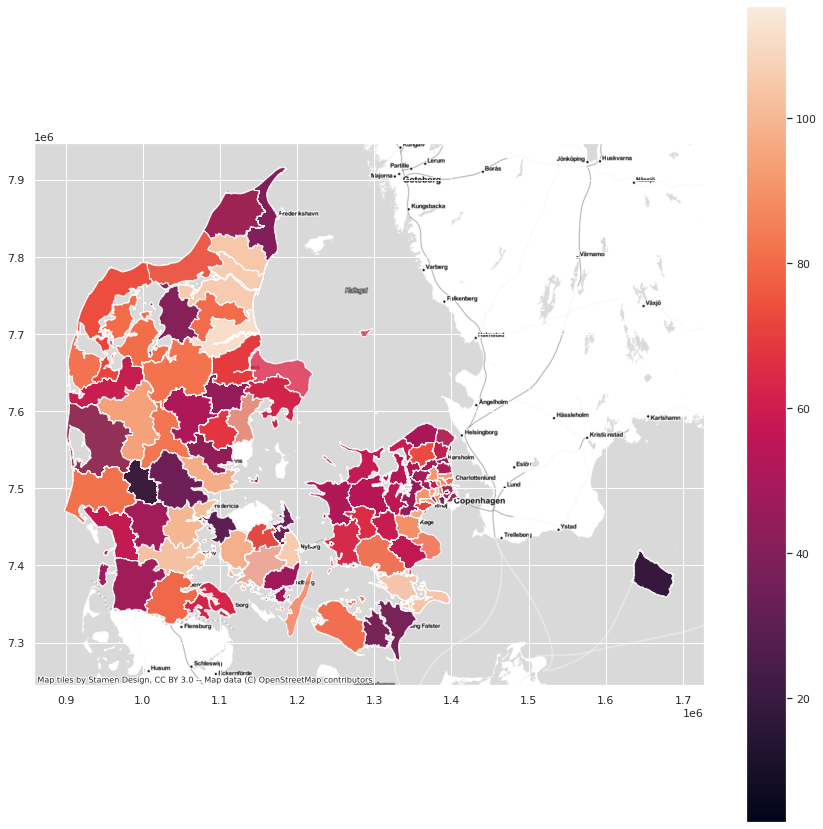

In [ ]:
ax = mu_no.plot(figsize=(15, 15), alpha=0.8, edgecolor=None, column="noise", legend="True")
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

#mu_no.plot(column="noise", legend="True", figsize=(14,14))

In [ ]:
m_data=pd.read_excel("https://github.com/CALDISS-AAU/sdsphd20/raw/master/datasets/spatialdata.xlsx")
m_data.head()

omr  alt2016  psyk2016  psykratio
0      København    64735      1326   0.020484
1  Frederiksberg    12364       258   0.020867
2         Dragør     1746        54   0.030928
3         Tårnby     5614       158   0.028144
4    Albertslund     3686        76   0.020619

Warning: I did not have time to join/merge this dataset to the
georeferenced one. But ideally it will be joined so I can plot both with different symbology and so to be able to visualize in the map

# Portfolio assignments for Thursday

**Requirement:** Work on solutions for the "Trump vs. GPT-2" assignment

## NLP: Trump vs. GPT-2

The site [https://faketrump.ai/](https://faketrump.ai/) WAS an interesting example of AI-powered fake-text generation. They wrote in 2019:

>We built an artificial intelligence model by fine-tuning [GPT-2](https://openai.com/blog/better-language-models/) to generate tweets in the style of Donald Trump’s Twitter account. After seeing the results, we also built a discriminator that can accurately detect fake tweets 77% of the time — think you can beat our classifier? Try it yourself!

Unfortunately, they decided to take down the site and the dataset.

GPT-2 is a neural transformer-based model, that has been announced by OpenAI in February 2019 and created considerable discussion because they decided - in contrast to their earlier policies - not to release the mode to the public. Their central argument was that the model could be used to produce fake news, spam and alike too easily. The footnote of the faketrump page reads: “Generating realistic fake text has become much more accessible. We hope to highlight the current state of text generation to demonstrate how difficult it is to discern fiction from reality.”


Since then several organizations and researchers have shown that it is [possible to develop systems to detect “fake text”](https://www.theguardian.com/technology/2019/jul/04/ai-fake-text-gpt-2-concerns-false-information). We believe that you too can implement a competitive system.

Having no dataset from that project, Roman decided to retrain GPT2 to generate new fake trump tweets. If they can do that, we can do that! However, it seems as if it is easier for ML models to identify our fake tweets...well...they are an AI company and probably spent more time on that...

> I’ve just watched Democrats scream over and over again about trying to Impeach the President of the United States. The Impeachment process is a sham.

> The Media must understand!“The New York Times is the leader on a very important subject: How to Combat Trump.” @foxandfriendsSo pathetic! @foxandfriendsI don’t think so.

> He is going to do it soon, and with proper borders. Border security is my top priority.The Democrats have failed the people of Arizona in everything else they have done, even their very good immigration laws. They have no sense.

The data can be found [here](https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz) and has the following format:


<table>
  <tr>
   <td>0
   </td>
   <td>1
   </td>
  </tr>
  <tr>
   <td>string
   </td>
   <td>boolean
   </td>
  </tr>
</table>

There are 7368 real Trump tweet and 7368 fake ones.

you can open it with:



```
data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
```



* Split the data and preprocess it, vectorizing the text using different approaches (BoW, TFIDF, LSI)

* Create a system that can identify the fake Trump tweets using LogisticRefression or other classifiers (Sklearn - If you like also more complex models with FastAI, Keras neural nets or alike)

* Explore a subset (~1000) of the real and fake tweets using LDA and visualize your exploration

* Consider exploring using a different approach (LSI + clustering) or perhaps even [CorEx](https://github.com/gregversteeg/corex_topic)

In [ ]:
# Your solutions from here...
import pandas as pd

%matplotlib inline 

In [ ]:
# Load the data

data = pd.read_json('https://github.com/SDS-AAU/SDS-master/raw/e2c959494d53859c1844604bed09a28a21566d0f/M3/assignments/trump_vs_GPT2.gz')
data.head()

0     1
0  I was thrilled to be back in the Great city of...  True
1  The Unsolicited Mail In Ballot Scam is a major...  True
2  As long as I am President, I will always stand...  True
3  Our Economy is doing great, and is ready to se...  True
4  If I do not sound like a typical Washington po...  True

In [ ]:
# module to split data into training / test

from sklearn.model_selection import train_test_split

# define in and outputs

X = data[0].values
y = data[1].values

In [ ]:
# Split the data in 80% trainig 20% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

### BoW

In [ ]:
# Simple BoW vectorizer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec_1 = vectorizer.fit_transform(X_train)

In [ ]:
# Instantiate a logistic regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

In [ ]:
# Train the model

model.fit(X_train_vec_1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Transform the test-set

X_test_vec_1 = vectorizer.transform(X_test)

In [ ]:
# Check performance of the model

model.score(X_test_vec_1, y_test)

0.8059701492537313

In [ ]:
# Predict on new data

y_pred = model.predict(X_test_vec_1)

In [ ]:
# confusion matrix by hand... :-)

pd.crosstab(y_test, y_pred)

col_0  False  True 
row_0              
False   1180    309
True     263   1196

###TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vec_2 = vectorizer.fit_transform(X_train)

model = LogisticRegression(max_iter=2000)

# Train the model

model.fit(X_train_vec_2, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Transform the test-set

X_test_vec_2 = vectorizer.transform(X_test)

In [ ]:
# Check performance of the model

model.score(X_test_vec_2, y_test)

0.8171641791044776

### LDA

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain

#corpus = list(chain(*data[0].next("word")))

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data[0])

pd.DataFrame(X.A, columns=vectorizer.get_feature_names())

00  000  000obama  000under  00am  00m  ...  सन  सपन  सबस  सम  हम  हर
0       0    0         0         0     0    0  ...   0    0    0   0   0   0
1       0    0         0         0     0    0  ...   0    0    0   0   0   0
2       0    0         0         0     0    0  ...   0    0    0   0   0   0
3       0    0         0         0     0    0  ...   0    0    0   0   0   0
4       0    0         0         0     0    0  ...   0    0    0   0   0   0
...    ..  ...       ...       ...   ...  ...  ...  ..  ...  ...  ..  ..  ..
14731   0    0         0         0     0    0  ...   0    0    0   0   0   0
14732   0    0         0         0     0    0  ...   0    0    0   0   0   0
14733   0    0         0         0     0    0  ...   0    0    0   0   0   0
14734   0    0         0         0     0    0  ...   0    0    0   0   0   0
14735   0    0         0         0     0    0  ...   0    0    0   0   0   0

[14736 rows x 13333 columns]

In [ ]:
# we'll use the faster multicore version of LDA

from gensim.models import LdaMulticore

In [ ]:
#Training the model
lda_model = LdaMulticore(data[0], id2word=dictionary, num_topics=10, workers = 4, passes=10)

NameError: ignored

In [ ]:
data[0]